In [ ]:
!wget https://raw.githubusercontent.com/SaraOmranian/PC2P/master/Analysis/mwmatching.py

--2021-05-03 10:47:30--  https://raw.githubusercontent.com/SaraOmranian/PC2P/master/Analysis/mwmatching.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40388 (39K) [text/plain]
Saving to: ‘mwmatching.py’

mwmatching.py       100%[===================>]  39.44K  --.-KB/s    in 0.002s  

2021-05-03 10:47:30 (25.0 MB/s) - ‘mwmatching.py’ saved [40388/40388]



In [ ]:
!wget https://raw.githubusercontent.com/SaraOmranian/PC2P/master/Analysis/PredictedClusters_Analysis.py

--2021-05-03 10:47:30--  https://raw.githubusercontent.com/SaraOmranian/PC2P/master/Analysis/PredictedClusters_Analysis.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘PredictedClusters_Analysis.py’

PredictedClusters_A 100%[===================>]   4.98K  --.-KB/s    in 0s      

2021-05-03 10:47:30 (54.1 MB/s) - ‘PredictedClusters_Analysis.py’ saved [5097/5097]



In [ ]:
!wget http://bliulab.net/idenPC-CAP/static/dataset/human_interaction_data.zip

--2021-05-03 10:47:30--  http://bliulab.net/idenPC-CAP/static/dataset/human_interaction_data.zip
Resolving bliulab.net (bliulab.net)... 39.106.95.61
Connecting to bliulab.net (bliulab.net)|39.106.95.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105335393 (100M) [application/zip]
Saving to: ‘human_interaction_data.zip’

human_interaction_d 100%[===================>] 100.46M   691KB/s    in 2m 30s  

2021-05-03 10:50:01 (688 KB/s) - ‘human_interaction_data.zip’ saved [105335393/105335393]



In [ ]:
!unzip /content/human_interaction_data.zip

Archive:  /content/human_interaction_data.zip
   creating: human_interaction_data/
   creating: human_interaction_data/protein_protein_interaction/
  inflating: human_interaction_data/protein_protein_interaction/GOSemSim_Wang_combined_BIOGRID-ORGANISM-Homo_sapiens.txt  
   creating: human_interaction_data/RNA-RNA-interaction/
  inflating: human_interaction_data/RNA-RNA-interaction/e_RNAInter_human_RRI.txt  
   creating: human_interaction_data/RNA_protein_interaction/
  inflating: human_interaction_data/RNA_protein_interaction/e_RNAInter_human_RPI.txt  


In [ ]:
!wget http://bliulab.net/idenPC-CAP/static/dataset/reference_complexes.zip

--2021-05-03 10:50:05--  http://bliulab.net/idenPC-CAP/static/dataset/reference_complexes.zip
Resolving bliulab.net (bliulab.net)... 39.106.95.61
Connecting to bliulab.net (bliulab.net)|39.106.95.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30215 (30K) [application/zip]
Saving to: ‘reference_complexes.zip’

reference_complexes 100%[===================>]  29.51K  96.5KB/s    in 0.3s    

2021-05-03 10:50:06 (96.5 KB/s) - ‘reference_complexes.zip’ saved [30215/30215]



In [ ]:
!unzip '/content/reference_complexes.zip'

Archive:  /content/reference_complexes.zip
   creating: reference_complexes/
  inflating: reference_complexes/CORUM-Human-Complexes_r.txt  
  inflating: reference_complexes/CORUM-Mouse-Complexes_r.txt  


In [ ]:
n = 50 #can change to any value upto 2645
reference_complexes ="/content/reference_complexes/CORUM-Human-Complexes_r.txt"
ppiedges_file ="/content/human_interaction_data/protein_protein_interaction/GOSemSim_Wang_combined_BIOGRID-ORGANISM-Homo_sapiens.txt"

In [ ]:
!git clone https://github.com/shchur/overlapping-community-detection.git

Cloning into 'overlapping-community-detection'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 68 (delta 26), reused 48 (delta 13), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [ ]:
%cd /content/overlapping-community-detection

/content/overlapping-community-detection


In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating nocd.egg-info
writing nocd.egg-info/PKG-INFO
writing dependency_links to nocd.egg-info/dependency_links.txt
writing top-level names to nocd.egg-info/top_level.txt
writing manifest file 'nocd.egg-info/SOURCES.txt'
adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
writing manifest file 'nocd.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/nocd
copying nocd/generate.py -> build/lib/nocd
copying nocd/train.py -> build/lib/nocd
copying nocd/utils.py -> build/lib/nocd
copying nocd/sampler.py -> build/lib/nocd
copying nocd/data.py -> build/lib/nocd
copying nocd/__init__.py -> build/lib/nocd
creating build/lib/nocd/metrics
copying nocd/metrics/unsupervised.py -> build/lib/nocd/metrics
copying nocd/metrics/supervised.py -> build/lib/nocd/metrics
copying nocd/metrics/__init__.py -> build/lib/nocd/metrics
cr

In [ ]:
import nocd
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.preprocessing import normalize

%matplotlib inline

torch.set_default_tensor_type(torch.cuda.FloatTensor)

# Defining and training the model

In [ ]:
def loadData(labelfile, graphfile):
  data = []
  n_communities = []
  #save all communities in list-data regardless of the order
  with open(labelfile) as inputfile:
      for line in inputfile:
          data.append(line.split())
  graph = {}
  #save n communities with maximum members in list-n_communities keeping the decreasing order of length
  # print(data)
  for i in range(n):
    # print(i)
       p = max(data,key=len)
       n_communities.append(p)
       data.remove(p)
  with open(graphfile) as inputfile:
        for line in inputfile:
            node = line.split()[0]#read 1st element in any column(node 1)
            neigh = line.split()[1]#read 2nd element in any column(node 2)
            #Not include those nodes, which are not in n_communities
            g = 0
            for i in range(n):
              #  print(i)
               if( node in n_communities[i]):
                     g=1
            if g==0:
              continue
            g1=0
            for i in range(len(n_communities)):
               if( neigh in n_communities[i]):
                     g1=1
            if g1==0:
              continue
            #save all the nodes and edges, which are common to the graphfile and n_communities
            if node in graph:
                graph[node].add(neigh)
            else:
                graph[node] = {neigh}
            if neigh in graph:
                graph[neigh].add(node)
            else:
                graph[neigh] = {node}
            # print(line)
  return n_communities, graph

In [ ]:
n_communities,graph = loadData(reference_complexes, ppiedges_file)

In [ ]:
def labeller(pos):
  p = [0]*n
  for i in pos:
     p[i]=1
  return  p

In [ ]:
def preprocessingData(graph, n_communities):
  adj_matrix = np.zeros((len(graph), len(graph)))
  degree_matrix = np.zeros((len(graph), len(graph)))
  feature_matrix = np.zeros((len(graph),3))
  node_index = {}
  j = 0
  for i in graph:
    node_index[i] = j
    j += 1
  # S = {}
  # s = open("/content/markov_clustering_protein_features.txt",'r')
  # for line in s:
  #   S[line.split()[0]] = [line.split()[1],line.split()[2],line.split()[3]]
  # s.close()
  # for i in node_index:
  #   feature_matrix[node_index[i]][0] = S[i][0]
  #   feature_matrix[node_index[i]][1] = S[i][1]
  #   feature_matrix[node_index[i]][2] = S[i][2]

  for i in node_index:
    for j in graph[i]:
      if(j in node_index):
        adj_matrix[node_index[i]][node_index[j]] = 1
    degree_matrix[node_index[i]][node_index[i]] = len(graph[i])
  label = np.zeros((len(graph), n))
  for nodeId in node_index:
    u=[]
    for i in n_communities:
      if nodeId in i:
        u.append(n_communities.index(i))
    label[node_index[nodeId]]=labeller(u)
  return adj_matrix, feature_matrix, label,node_index

In [ ]:
adj_matrix, feature_matrix, label,nd = preprocessingData(graph, n_communities)


In [ ]:
adj_matrix.shape

(771, 771)

In [ ]:
feature_matrix = np.eye(len(adj_matrix))

In [ ]:
feature_matrix.shape

(771, 771)

In [ ]:
a,b = label.shape

In [ ]:
a

771

In [ ]:
b

50

In [ ]:
from scipy import sparse

In [ ]:
adj_matrix_sparse = sparse.csr_matrix(adj_matrix)

In [ ]:
adj_matrix_sparse

<771x771 sparse matrix of type '<class 'numpy.float64'>'
	with 34364 stored elements in Compressed Sparse Row format>

In [ ]:
feature_matrix_sparse = sparse.csr_matrix(feature_matrix)

In [ ]:
feature_matrix_sparse

<771x771 sparse matrix of type '<class 'numpy.float64'>'
	with 771 stored elements in Compressed Sparse Row format>

Define the hyperparameters

In [ ]:
hidden_sizes = [512]    # hidden sizes of the GNN
weight_decay = 1e-3    # strength of L2 regularization on GNN weights
dropout = 0.05      # whether to use dropout
batch_norm = True       # whether to use batch norm
lr = 1e-4               # learning rate
max_epochs = 1000       # number of epochs to train
display_step = 20   # how often to compute validation loss
balance_loss = True     # whether to use balanced loss
stochastic_loss = True  # whether to use stochastic or full-batch training
batch_size = 20000      # batch size (only for stochastic training)

Select & normalize the feature matrix

For some datasets where the features are very informative / correlated with the community structure it's better to use `X` as input (e.g. co-authorship networks w/ keywords as node features). Otherwise, you should try using `A` or `[A, X]` as input.

In [ ]:
x_norm = normalize(feature_matrix_sparse)  # node features
# x_norm = normalize(A)  # adjacency matrix
# x_norm = sp.hstack([normalize(X), normalize(A)])  # concatenate A and X
x_norm = nocd.utils.to_sparse_tensor(x_norm).cuda()

Define the GNN model

In [ ]:
N = label.shape[0]
K = label.shape[1]
sampler = nocd.sampler.get_edge_sampler(adj_matrix_sparse, batch_size, batch_size, num_workers=5)
gnn = nocd.nn.GCN(x_norm.shape[1], hidden_sizes, K, batch_norm=batch_norm, dropout=dropout).cuda()
adj_norm = gnn.normalize_adj(adj_matrix_sparse)
decoder = nocd.nn.BerpoDecoder(N, adj_matrix_sparse.nnz, balance_loss=balance_loss)
opt = torch.optim.Adam(gnn.parameters(), lr=lr)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
def get_nmi(thresh=0.5):
    """Compute Overlapping NMI of the communities predicted by the GNN."""
    gnn.eval()
    Z = F.relu(gnn(x_norm, adj_norm))
    Z_pred = Z.cpu().detach().numpy() > thresh
    nmi = nocd.metrics.overlapping_nmi(Z_pred, label)
    return nmi

Training loop

In [ ]:
val_loss = np.inf
validation_fn = lambda: val_loss
early_stopping = nocd.train.NoImprovementStopping(validation_fn, patience=10)
model_saver = nocd.train.ModelSaver(gnn)

for epoch, batch in enumerate(sampler):
    if epoch > max_epochs:
        break
    if epoch % 25 == 0:
        with torch.no_grad():
            gnn.eval()
            # Compute validation loss
            Z = F.relu(gnn(x_norm, adj_norm))
            val_loss = decoder.loss_full(Z, adj_matrix_sparse)
            print(f'Epoch {epoch:4d}, loss.full = {val_loss:.4f}, nmi = {get_nmi():.2f}')
            
            # Check if it's time for early stopping / to save the model
            early_stopping.next_step()
            if early_stopping.should_save():
                model_saver.save()
            if early_stopping.should_stop():
                print(f'Breaking due to early stopping at epoch {epoch}')
                break
            
    # Training step
    gnn.train()
    opt.zero_grad()
    Z = F.relu(gnn(x_norm, adj_norm))
    ones_idx, zeros_idx = batch
    if stochastic_loss:
        loss = decoder.loss_batch(Z, ones_idx, zeros_idx)
    else:
        loss = decoder.loss_full(Z, adj_matrix_sparse)
    loss += nocd.utils.l2_reg_loss(gnn, scale=weight_decay)
    loss.backward()
    opt.step()    

Epoch    0, loss.full = 0.7240, nmi = 0.14
Epoch   25, loss.full = 0.3766, nmi = 0.26
Epoch   50, loss.full = 0.3131, nmi = 0.33


Depending on whether you use balanced loss or not, you should (probably) use different threshold values. From my experience, following are reasonable defaults:
 - for `balance_loss = True`: `thresh = 0.5`
 - for `balance_loss = False`: `thresh = 0.01`
 
You can look at the distribution of the non-zero entries of `Z` to decide on a good value for the threshold. 
I guess it makes sense to select a value that lies in the leftmost "valley" of histogram below. 
You can also look at the unsupervised metrics in the next section of this notebook to make an informed choice.

Note that all of these are just speculations based on the behavior that I observed for a handful of datasets, YMMV.

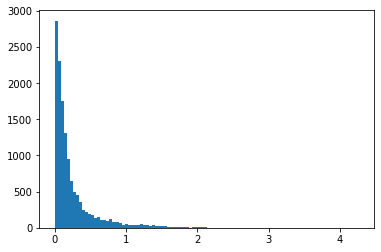

In [ ]:
plt.hist(Z[Z > 0].cpu().detach().numpy(), 100);

In [ ]:
thresh = 0.5

Z = F.relu(gnn(x_norm, adj_norm))
Z_pred = Z.cpu().detach().numpy() > thresh
model_saver.restore()
print(f'Final nmi = {get_nmi(thresh):.3f}')

Final nmi = 0.332


# Analyzing the results

### Visualize the adjacency matrix sorted by the communities

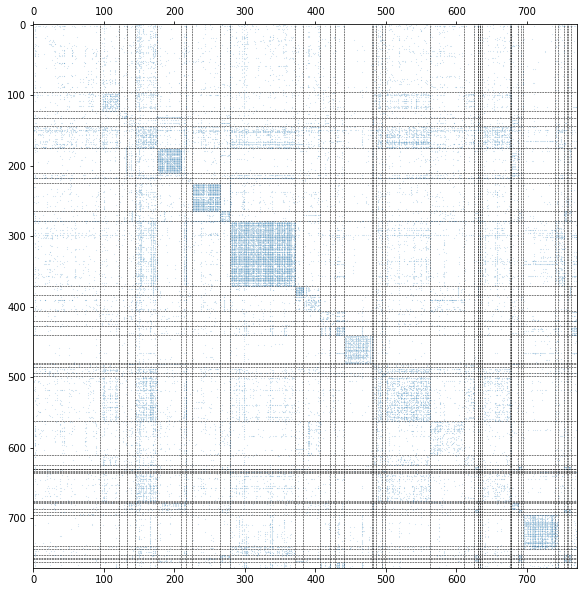

In [ ]:
plt.figure(figsize=[10, 10])
z = np.argmax(Z_pred, 1)
o = np.argsort(z)
nocd.utils.plot_sparse_clustered_adjacency(adj_matrix_sparse, K, z, o, markersize=0.05)

In [ ]:
# Sizes of detected communities
print(Z_pred.sum(0))

[ 13  27  12  15  36  37  14  16  43  56  99  16  30  21  13  25  41   5
  10  18  88  14  92   8  92  94  10  13  42  14   8  18  86   4  17 151
  49  16  56  15   9  24  62  66  11 126  43  45  31  30]


In [ ]:
print(label.sum(0))

[140. 103.  80.  79.  78.  47.  48.  38.  36.  36.  33.  33.  32.  31.
  30.  29.  28.  25.  27.  26.  25.  25.  24.  24.  23.  22.  21.  20.
  20.  19.  18.  18.  18.  18.  18.  18.  17.  17.  17.  17.  17.  17.
  17.  17.  17.  16.  16.  16.  16.  16.]


In [ ]:
Z_pred.shape

(771, 50)

# Original Community File( having n communities)

In [ ]:
with open('/content/' +str(n) +'_original_communities.txt', 'w') as file:
    for item in n_communities:
      for o in item:
            file.write("%s" % o + "\t")
      file.write("\n")

#Detected community file (having n communities)

In [ ]:
key_list = list(nd.keys())
val_list = list(nd.values())
G={}
for i in range(len(key_list)):
  position = val_list.index(i)
  G[key_list[position]] = [j for j,x in enumerate(list(Z_pred[i])) if x == 1]
final_L = []
for i in range(n):
  final_L.append([])
for i in G:
  for j in G[i]:
    final_L[j].append(i)
with open('/content/' +str(n) +'_original_communities_detected.txt', 'w') as file:
    for item in final_L:
      for o in item:
            file.write("%s" % o + "\t")
      file.write("\n")

Total Known Complexes (Reference One)

In [ ]:
L = []
f = open("/content/" + str(n) + "_original_communities.txt","r")
for line in f:
  L.append(line.split())
print(len(L))

50


Total Predicted Complexes

In [ ]:
R = []
g = open("/content/" +str(n) +"_original_communities_detected.txt","r")
for line in g:
  if len(line.split())>0:
     R.append(line.split())
print(len(R))

50


Checking for Overlapping Scores and calculating number of matching sets

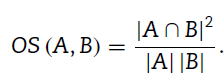

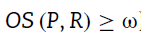

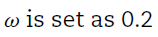

In [ ]:
M_L = set()
M_R = set()
k = 0
for i in R:
  for j in L:
     print("i: ",R.index(i))
     print("j: ",L.index(j))
     if len(set(i).intersection(set(j)))**2/(len(i)*len(j))>=0.2:
       M_R.add(frozenset(i))
       M_L.add(frozenset(j))
       k = k +1
       print("k: ",k)

Streaming output truncated to the last 5000 lines.
j:  34
i:  0
j:  35
i:  0
j:  36
i:  0
j:  37
i:  0
j:  38
i:  0
j:  39
i:  0
j:  40
i:  0
j:  41
i:  0
j:  42
i:  0
j:  43
i:  0
j:  44
i:  0
j:  45
i:  0
j:  46
i:  0
j:  47
i:  0
j:  48
i:  0
j:  49
i:  1
j:  0
i:  1
j:  1
i:  1
j:  2
i:  1
j:  3
i:  1
j:  4
i:  1
j:  5
i:  1
j:  6
i:  1
j:  7
i:  1
j:  8
i:  1
j:  9
i:  1
j:  10
i:  1
j:  11
i:  1
j:  12
i:  1
j:  13
i:  1
j:  14
i:  1
j:  15
i:  1
j:  16
i:  1
j:  17
i:  1
j:  18
i:  1
j:  19
i:  1
j:  20
i:  1
j:  21
i:  1
j:  22
i:  1
j:  23
i:  1
j:  24
i:  1
j:  25
i:  1
j:  26
i:  1
j:  27
i:  1
j:  28
i:  1
j:  29
i:  1
j:  30
i:  1
j:  31
i:  1
j:  32
i:  1
j:  33
i:  1
j:  34
i:  1
j:  35
i:  1
j:  36
i:  1
j:  37
i:  1
j:  38
i:  1
j:  39
i:  1
j:  40
i:  1
j:  41
i:  1
j:  42
k:  1
i:  1
j:  43
i:  1
j:  44
i:  1
j:  45
i:  1
j:  46
i:  1
j:  47
i:  1
j:  48
i:  1
j:  49
i:  2
j:  0
i:  2
j:  1
i:  2
j:  2
i:  2
j:  3
i:  2
j:  4
i:  2
j:  5
i:  2
j:  6
i:  2
j:  7
i:  2

Known Matched Complexes

In [ ]:
print(len(M_L))

30


Predicted Matched Complexes



In [ ]:
print(len(M_R))

23


Recall

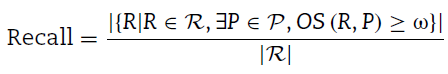

In [ ]:
r = len(M_R)/len(R)
print(r)

0.46


Precision

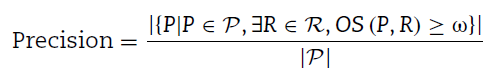

In [ ]:
p = len(M_L)/len(L)
print(p)

0.6


f-measure

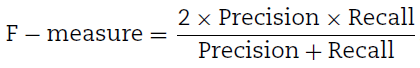

In [ ]:
f_measure = (2*p*r)/(p+r)
print(f_measure)

0.5207547169811321


# Evaluation metrics corresponding to the PC2P paper

In [ ]:
%cd '/content/'

/content


In [ ]:
from mwmatching import maxWeightMatching

In [ ]:
from PredictedClusters_Analysis import canonical_protein_name,is_numeric,matching_score,maximum_matching_ratio,clusteringwise_sensitivity,positive_predictive_value,accuracy,fraction_matched,clusteringwise_separation,read_network,jaccard,precision_Jaccard,recall_Jaccard,F_measure_Jaccard

In [ ]:
setL = set()
for i in L:
  setL.add(frozenset(i))

In [ ]:
setR = set()
for i in R:
  setR.add(frozenset(i))

Maximum Matxhing Ratio (MMR)

In [ ]:
maximum_matching_ratio(setL,setR)

score is: {(1, 77): 0.38200339558573854, (2, 77): 0.3407258064516129, (4, 79): 0.7184035476718403, (4, 84): 0.7012987012987013, (5, 80): 0.20511627906976745, (7, 55): 0.4470899470899471, (7, 83): 0.6766766766766766, (8, 55): 0.2689075630252101, (9, 61): 0.42649903288201163, (9, 67): 0.34194528875379937, (9, 80): 0.4364176150420584, (9, 87): 0.397378035675908, (11, 77): 0.4906621392190153, (12, 61): 0.3522727272727273, (12, 67): 0.24603174603174602, (12, 80): 0.36046511627906974, (12, 87): 0.31313131313131315, (14, 61): 0.7778409090909091, (14, 67): 0.5881944444444445, (14, 80): 0.7959302325581395, (14, 87): 0.7102272727272727, (15, 55): 0.25396825396825395, (15, 83): 0.33783783783783783, (16, 77): 0.4857685009487666, (17, 52): 0.8372093023255814, (17, 63): 0.8, (17, 91): 0.6428571428571429, (19, 77): 0.4857685009487666, (20, 55): 0.2689075630252101, (20, 83): 0.4069952305246423, (21, 61): 0.3526170798898072, (21, 67): 0.24627224627224628, (21, 80): 0.3608174770965469, (21, 87): 0.31343

0.19993024217993663

Sensitivity (*SN*)

In [ ]:
clusteringwise_sensitivity(setL,setR)

0.7783472133247918

Positive Predicted Value (*PPV*)

In [ ]:
positive_predictive_value(setL,setR)

0.2764691886747561

Accuracy(*ACC*)

In [ ]:
accuracy(setL,setR)

0.463884708279075

Fraction Match(*FRM*)

In [ ]:
fraction_matched(setL,setR)

0.58

Separation (*SEP*)

In [ ]:
clusteringwise_separation(setL,setR)

0.14355240522721163

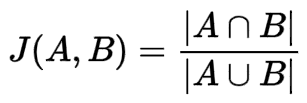

Precision 

In [ ]:
precision_Jaccard(setL,setR)

0.34

Recall

In [ ]:
recall_Jaccard(setL,setR)

0.28

F-Measure

In [ ]:
F_measure_Jaccard(setL,setR)

0.3070967741935484